In [1]:
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

# Seed

In [2]:
seed_number = 44

torch.manual_seed(seed_number)
torch.cuda.manual_seed(seed_number)
torch.cuda.manual_seed_all(seed_number) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed_number)
#random.seed(seed_number)

# MNIST data download

In [3]:
train_dataset = torchvision.datasets.MNIST('./data/', train=True, download=True)
test_dataset  = torchvision.datasets.MNIST('./data/', train=False)

# Load dataset

In [4]:
X      = train_dataset.data
X_test = test_dataset.data

print(X.shape)
print(X_test.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


# Normalization

In [5]:
X = X / 255.
X_test = X_test / 255.

X = (X - 0.5) / 0.5
X_test = (X_test - 0.5) / 0.5

# Data loader

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

X = X.to(device=device)
X_test = X_test.to(device=device)

cpu


In [7]:
train_ds = torch.utils.data.TensorDataset(X)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True)

# Model

### https://tutorials.pytorch.kr/beginner/dcgan_faces_tutorial.html

In [8]:
class Generator(torch.nn.Module):
    def __init__(self, d_z):
        super(Generator, self).__init__()
        self.ConvT1 = torch.nn.ConvTranspose2d(d_z, 64, 4, 1, 0, bias=False)
        self.ConvT2 = torch.nn.ConvTranspose2d(64,  32, 4, 1, 0, bias=False)
        self.ConvT3 = torch.nn.ConvTranspose2d(32,  16, 4, 2, 1, bias=False)
        self.ConvT4 = torch.nn.ConvTranspose2d(16,   1, 4, 2, 1, bias=False)
        
    def forward(self, xb):        
        out = self.ConvT1(xb)
        out = torch.nn.BatchNorm2d(64)(out)
        out = torch.nn.LeakyReLU(0.2)(out)
        
        out = self.ConvT2(out)
        out = torch.nn.BatchNorm2d(32)(out)
        out = torch.nn.LeakyReLU(0.2)(out)
        
        out = self.ConvT3(out)
        out = torch.nn.BatchNorm2d(16)(out)
        out = torch.nn.LeakyReLU(0.2)(out)
        
        out = self.ConvT4(out)
        out = torch.nn.Tanh()(out)
        return out

In [9]:
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.Conv1 = torch.nn.Conv2d(1,   16, 4, 2, 1, bias=False)
        self.Conv2 = torch.nn.Conv2d(16,  32, 4, 2, 1, bias=False)
        self.Conv3 = torch.nn.Conv2d(32,  64, 4, 1, 0, bias=False)
        self.Conv4 = torch.nn.Conv2d(64,   1, 4, 1, 0, bias=False)
        
    def forward(self, xb):  
        out = self.Conv1(xb)
        out = torch.nn.LeakyReLU(0.2)(out)
        
        out = self.Conv2(out)
        out = torch.nn.BatchNorm2d(32)(out)
        out = torch.nn.LeakyReLU(0.2)(out)
        
        out = self.Conv3(out)
        out = torch.nn.BatchNorm2d(64)(out)
        out = torch.nn.LeakyReLU(0.2)(out)
        
        out = self.Conv4(out)
        out = torch.nn.Sigmoid()(out)
        return out

In [10]:
d_z = 64

Generator = Generator(d_z=d_z).to(device)
Discriminator = Discriminator().to(device)

print(Generator)
print(Discriminator)

Generator(
  (ConvT1): ConvTranspose2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (ConvT2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (ConvT3): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (ConvT4): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
)
Discriminator(
  (Conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (Conv2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (Conv3): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (Conv4): Conv2d(64, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


# Cost function

In [11]:
criterion = torch.nn.BCELoss()

# Optimizer

In [12]:
D_optimizer = torch.optim.Adam(Discriminator.parameters(), betas=(0.5, 0.999), lr=0.0002)
G_optimizer = torch.optim.Adam(Generator.parameters(), betas=(0.5, 0.999), lr=0.0002)

# Training

======== Epoch 1 =======
Loss     => G:2.18882, D:0.20582
Accuracy => G:2.11%, D:96.76%, Elapsed time => 50.905 sec

======== Epoch 2 =======
Loss     => G:2.48620, D:0.14823
Accuracy => G:1.81%, D:97.80%, Elapsed time => 50.665 sec

======== Epoch 3 =======
Loss     => G:2.85207, D:0.12652
Accuracy => G:2.01%, D:97.64%, Elapsed time => 50.550 sec

======== Epoch 4 =======
Loss     => G:2.75406, D:0.14488
Accuracy => G:2.67%, D:96.73%, Elapsed time => 50.688 sec

======== Epoch 5 =======
Loss     => G:2.50784, D:0.18368
Accuracy => G:4.04%, D:95.22%, Elapsed time => 50.477 sec


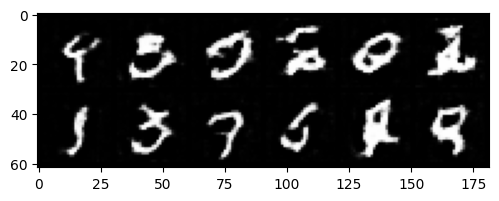


======== Epoch 6 =======
Loss     => G:2.35907, D:0.20648
Accuracy => G:4.92%, D:94.32%, Elapsed time => 50.733 sec

======== Epoch 7 =======
Loss     => G:2.34537, D:0.20311
Accuracy => G:4.50%, D:94.96%, Elapsed time => 50.153 sec

======== Epoch 8 =======
Loss     => G:2.36041, D:0.20207
Accuracy => G:4.66%, D:94.72%, Elapsed time => 50.212 sec

======== Epoch 9 =======
Loss     => G:2.43792, D:0.18951
Accuracy => G:4.17%, D:95.28%, Elapsed time => 50.567 sec

======== Epoch 10 =======
Loss     => G:2.49073, D:0.18054
Accuracy => G:3.92%, D:95.65%, Elapsed time => 50.433 sec


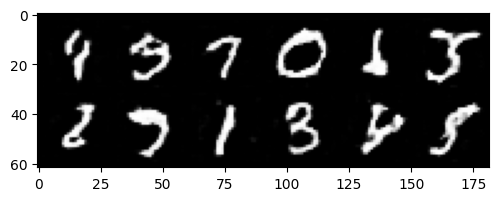


======== Epoch 11 =======
Loss     => G:2.62601, D:0.17185
Accuracy => G:3.34%, D:95.94%, Elapsed time => 50.550 sec

======== Epoch 12 =======
Loss     => G:2.65571, D:0.16707
Accuracy => G:3.52%, D:96.15%, Elapsed time => 50.638 sec

======== Epoch 13 =======
Loss     => G:2.72853, D:0.15897
Accuracy => G:3.34%, D:96.24%, Elapsed time => 50.331 sec

======== Epoch 14 =======
Loss     => G:2.77960, D:0.15628
Accuracy => G:3.84%, D:96.13%, Elapsed time => 50.250 sec

======== Epoch 15 =======
Loss     => G:2.86426, D:0.14235
Accuracy => G:3.01%, D:96.88%, Elapsed time => 50.265 sec


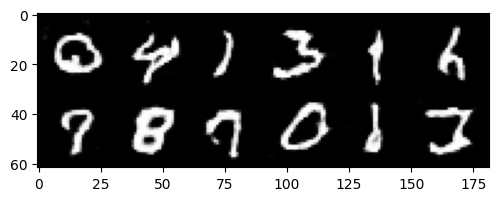


======== Epoch 16 =======
Loss     => G:2.80660, D:0.18165
Accuracy => G:3.81%, D:95.55%, Elapsed time => 50.317 sec

======== Epoch 17 =======
Loss     => G:2.90782, D:0.12961
Accuracy => G:2.63%, D:97.43%, Elapsed time => 50.367 sec

======== Epoch 18 =======
Loss     => G:2.98914, D:0.13112
Accuracy => G:2.74%, D:97.14%, Elapsed time => 50.333 sec

======== Epoch 19 =======
Loss     => G:2.82311, D:0.17736
Accuracy => G:4.07%, D:95.46%, Elapsed time => 50.433 sec

======== Epoch 20 =======
Loss     => G:3.11561, D:0.12729
Accuracy => G:2.46%, D:97.25%, Elapsed time => 50.284 sec


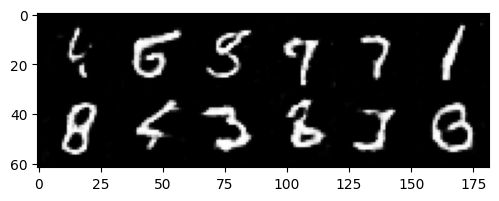


======== Epoch 21 =======
Loss     => G:3.12630, D:0.12567
Accuracy => G:2.40%, D:97.28%, Elapsed time => 50.405 sec

======== Epoch 22 =======
Loss     => G:3.17716, D:0.11962
Accuracy => G:2.46%, D:97.46%, Elapsed time => 50.445 sec

======== Epoch 23 =======
Loss     => G:3.21146, D:0.12266
Accuracy => G:2.62%, D:97.11%, Elapsed time => 50.417 sec

======== Epoch 24 =======
Loss     => G:3.20751, D:0.12976
Accuracy => G:3.30%, D:96.96%, Elapsed time => 50.383 sec

======== Epoch 25 =======
Loss     => G:3.23690, D:0.11250
Accuracy => G:2.11%, D:97.62%, Elapsed time => 50.449 sec


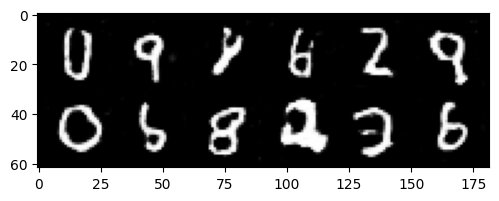


======== Epoch 26 =======
Loss     => G:3.22343, D:0.13886
Accuracy => G:2.73%, D:96.85%, Elapsed time => 50.760 sec

======== Epoch 27 =======
Loss     => G:3.33489, D:0.11234
Accuracy => G:2.13%, D:97.57%, Elapsed time => 50.383 sec

======== Epoch 28 =======
Loss     => G:3.36727, D:0.11226
Accuracy => G:2.35%, D:97.56%, Elapsed time => 50.418 sec

======== Epoch 29 =======
Loss     => G:3.16535, D:0.15870
Accuracy => G:4.01%, D:96.05%, Elapsed time => 50.499 sec

======== Epoch 30 =======
Loss     => G:3.28597, D:0.10699
Accuracy => G:2.13%, D:97.96%, Elapsed time => 50.616 sec


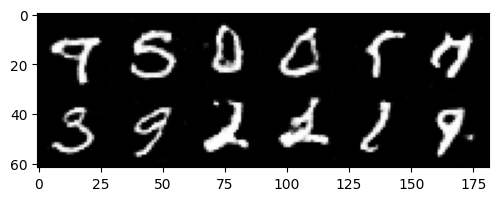


======== Epoch 31 =======
Loss     => G:3.45855, D:0.10125
Accuracy => G:1.87%, D:97.93%, Elapsed time => 50.659 sec

======== Epoch 32 =======
Loss     => G:3.39844, D:0.11638
Accuracy => G:2.16%, D:97.54%, Elapsed time => 50.667 sec

======== Epoch 33 =======
Loss     => G:3.44734, D:0.14830
Accuracy => G:3.07%, D:96.91%, Elapsed time => 50.718 sec

======== Epoch 34 =======
Loss     => G:3.23008, D:0.11303
Accuracy => G:2.31%, D:97.74%, Elapsed time => 50.632 sec

======== Epoch 35 =======
Loss     => G:3.53157, D:0.09680
Accuracy => G:1.80%, D:98.07%, Elapsed time => 50.629 sec


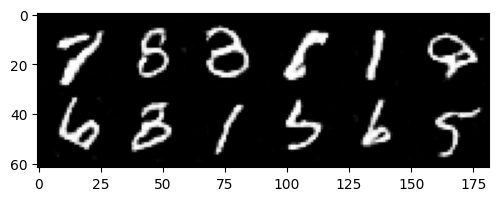


======== Epoch 36 =======
Loss     => G:3.36475, D:0.11795
Accuracy => G:2.53%, D:97.47%, Elapsed time => 50.291 sec

======== Epoch 37 =======
Loss     => G:3.59176, D:0.09563
Accuracy => G:1.76%, D:98.08%, Elapsed time => 50.213 sec

======== Epoch 38 =======
Loss     => G:3.62450, D:0.09923
Accuracy => G:1.96%, D:97.79%, Elapsed time => 50.229 sec

======== Epoch 39 =======
Loss     => G:3.57393, D:0.10606
Accuracy => G:2.31%, D:97.82%, Elapsed time => 50.167 sec

======== Epoch 40 =======
Loss     => G:3.58335, D:0.11016
Accuracy => G:2.29%, D:97.44%, Elapsed time => 50.317 sec


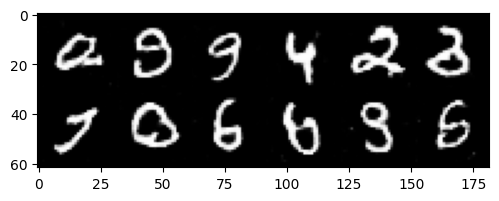


======== Epoch 41 =======
Loss     => G:3.63312, D:0.08810
Accuracy => G:1.50%, D:98.39%, Elapsed time => 50.534 sec

======== Epoch 42 =======
Loss     => G:3.63108, D:0.09697
Accuracy => G:2.15%, D:97.93%, Elapsed time => 51.862 sec

======== Epoch 43 =======
Loss     => G:3.58206, D:0.11509
Accuracy => G:2.12%, D:97.72%, Elapsed time => 50.483 sec

======== Epoch 44 =======
Loss     => G:3.75696, D:0.08243
Accuracy => G:1.53%, D:98.42%, Elapsed time => 50.540 sec

======== Epoch 45 =======
Loss     => G:3.72684, D:0.08979
Accuracy => G:1.98%, D:98.04%, Elapsed time => 50.443 sec


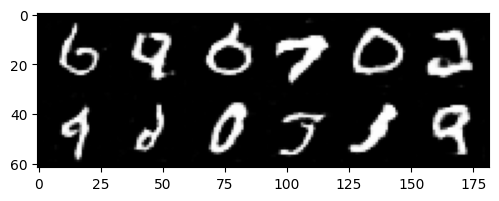


======== Epoch 46 =======
Loss     => G:3.58835, D:0.11621
Accuracy => G:2.22%, D:97.71%, Elapsed time => 50.272 sec

======== Epoch 47 =======
Loss     => G:3.75144, D:0.08619
Accuracy => G:1.80%, D:98.19%, Elapsed time => 50.419 sec

======== Epoch 48 =======
Loss     => G:3.91401, D:0.07519
Accuracy => G:1.30%, D:98.69%, Elapsed time => 50.509 sec

======== Epoch 49 =======
Loss     => G:3.56139, D:0.17339
Accuracy => G:4.85%, D:94.95%, Elapsed time => 50.367 sec

======== Epoch 50 =======
Loss     => G:3.33180, D:0.11732
Accuracy => G:2.34%, D:97.32%, Elapsed time => 50.333 sec


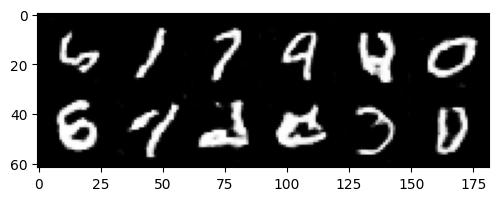


======== Epoch 51 =======
Loss     => G:3.84968, D:0.07746
Accuracy => G:1.23%, D:98.59%, Elapsed time => 50.799 sec

======== Epoch 52 =======
Loss     => G:3.84982, D:0.07361
Accuracy => G:1.52%, D:98.74%, Elapsed time => 50.668 sec

======== Epoch 53 =======
Loss     => G:3.87669, D:0.12254
Accuracy => G:3.09%, D:97.01%, Elapsed time => 50.666 sec

======== Epoch 54 =======
Loss     => G:3.51310, D:0.09557
Accuracy => G:1.90%, D:98.19%, Elapsed time => 50.839 sec

======== Epoch 55 =======
Loss     => G:3.83405, D:0.10820
Accuracy => G:2.52%, D:97.49%, Elapsed time => 50.828 sec


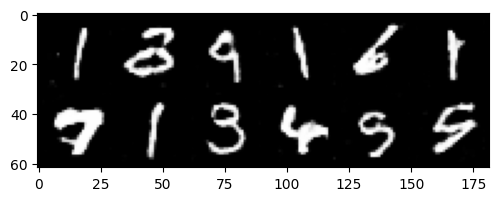


======== Epoch 56 =======
Loss     => G:3.73746, D:0.08008
Accuracy => G:1.33%, D:98.67%, Elapsed time => 50.350 sec

======== Epoch 57 =======
Loss     => G:4.07191, D:0.06602
Accuracy => G:1.19%, D:98.91%, Elapsed time => 50.400 sec

======== Epoch 58 =======
Loss     => G:3.92975, D:0.09265
Accuracy => G:1.71%, D:98.20%, Elapsed time => 50.300 sec

======== Epoch 59 =======
Loss     => G:4.06066, D:0.06608
Accuracy => G:1.06%, D:98.91%, Elapsed time => 50.367 sec

======== Epoch 60 =======
Loss     => G:3.74128, D:0.12681
Accuracy => G:2.84%, D:96.78%, Elapsed time => 50.317 sec


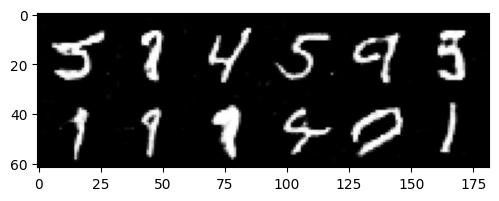


======== Epoch 61 =======
Loss     => G:4.01012, D:0.06746
Accuracy => G:1.13%, D:98.92%, Elapsed time => 50.120 sec

======== Epoch 62 =======
Loss     => G:4.14515, D:0.06752
Accuracy => G:1.14%, D:98.77%, Elapsed time => 50.201 sec

======== Epoch 63 =======
Loss     => G:3.98797, D:0.09666
Accuracy => G:1.79%, D:97.93%, Elapsed time => 50.314 sec

======== Epoch 64 =======
Loss     => G:4.08675, D:0.06752
Accuracy => G:1.13%, D:98.89%, Elapsed time => 50.184 sec

======== Epoch 65 =======
Loss     => G:3.74124, D:0.12282
Accuracy => G:2.86%, D:97.01%, Elapsed time => 50.182 sec


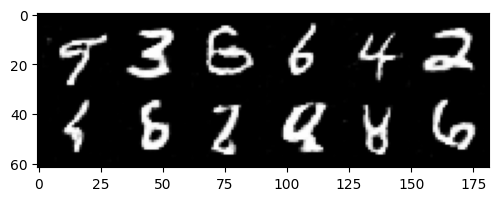


======== Epoch 66 =======
Loss     => G:4.08287, D:0.06566
Accuracy => G:1.07%, D:98.93%, Elapsed time => 50.206 sec

======== Epoch 67 =======
Loss     => G:4.16414, D:0.06359
Accuracy => G:1.30%, D:98.82%, Elapsed time => 50.167 sec

======== Epoch 68 =======
Loss     => G:3.80759, D:0.11639
Accuracy => G:2.25%, D:97.57%, Elapsed time => 50.166 sec

======== Epoch 69 =======
Loss     => G:4.22979, D:0.05709
Accuracy => G:0.88%, D:99.12%, Elapsed time => 50.206 sec

======== Epoch 70 =======
Loss     => G:4.20751, D:0.06844
Accuracy => G:1.41%, D:98.56%, Elapsed time => 50.212 sec


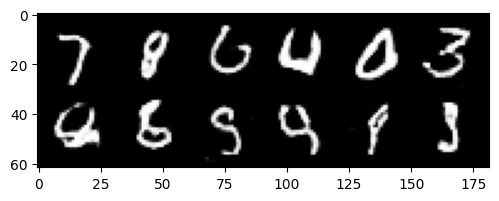


======== Epoch 71 =======
Loss     => G:4.21976, D:0.06431
Accuracy => G:1.22%, D:98.74%, Elapsed time => 50.015 sec

======== Epoch 72 =======
Loss     => G:4.25691, D:0.06289
Accuracy => G:1.22%, D:98.78%, Elapsed time => 50.418 sec

======== Epoch 73 =======
Loss     => G:4.22273, D:0.07170
Accuracy => G:1.49%, D:98.60%, Elapsed time => 50.350 sec

======== Epoch 74 =======
Loss     => G:4.08858, D:0.10774
Accuracy => G:2.07%, D:97.84%, Elapsed time => 50.333 sec

======== Epoch 75 =======
Loss     => G:4.29860, D:0.05184
Accuracy => G:0.81%, D:99.37%, Elapsed time => 50.433 sec


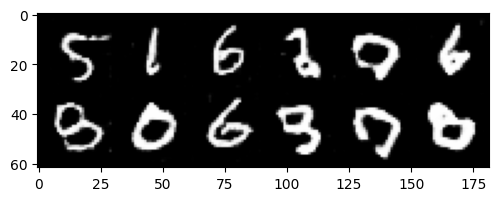


======== Epoch 76 =======
Loss     => G:4.08034, D:0.09752
Accuracy => G:1.97%, D:98.02%, Elapsed time => 50.403 sec

======== Epoch 77 =======
Loss     => G:4.34762, D:0.05585
Accuracy => G:1.05%, D:99.13%, Elapsed time => 50.381 sec

======== Epoch 78 =======
Loss     => G:4.30691, D:0.06607
Accuracy => G:1.31%, D:98.74%, Elapsed time => 50.200 sec

======== Epoch 79 =======
Loss     => G:4.42388, D:0.05668
Accuracy => G:1.04%, D:99.07%, Elapsed time => 50.300 sec

======== Epoch 80 =======
Loss     => G:4.20059, D:0.08736
Accuracy => G:1.70%, D:98.10%, Elapsed time => 50.383 sec


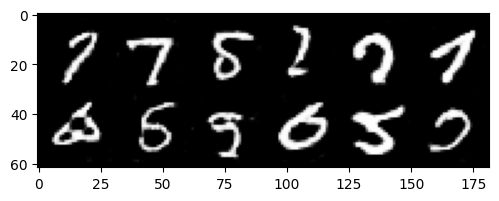


======== Epoch 81 =======
Loss     => G:4.43753, D:0.09310
Accuracy => G:1.87%, D:98.04%, Elapsed time => 50.200 sec

======== Epoch 82 =======
Loss     => G:3.92434, D:0.07147
Accuracy => G:1.25%, D:98.79%, Elapsed time => 50.188 sec

======== Epoch 83 =======
Loss     => G:4.34272, D:0.06710
Accuracy => G:1.26%, D:98.66%, Elapsed time => 50.328 sec

======== Epoch 84 =======
Loss     => G:4.46567, D:0.05436
Accuracy => G:1.09%, D:99.00%, Elapsed time => 50.169 sec

======== Epoch 85 =======
Loss     => G:4.26994, D:0.08692
Accuracy => G:1.74%, D:98.19%, Elapsed time => 50.195 sec


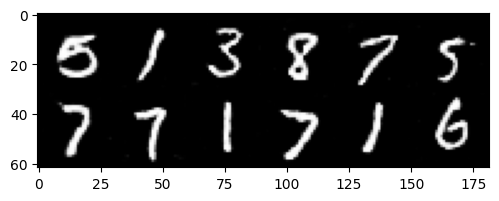


======== Epoch 86 =======
Loss     => G:4.44857, D:0.04701
Accuracy => G:0.70%, D:99.39%, Elapsed time => 50.283 sec

======== Epoch 87 =======
Loss     => G:3.74982, D:0.18022
Accuracy => G:4.13%, D:95.31%, Elapsed time => 50.468 sec

======== Epoch 88 =======
Loss     => G:4.17757, D:0.06221
Accuracy => G:1.14%, D:98.98%, Elapsed time => 50.467 sec

======== Epoch 89 =======
Loss     => G:4.46205, D:0.04869
Accuracy => G:0.83%, D:99.33%, Elapsed time => 50.450 sec

======== Epoch 90 =======
Loss     => G:4.09025, D:0.10187
Accuracy => G:1.80%, D:97.88%, Elapsed time => 50.517 sec


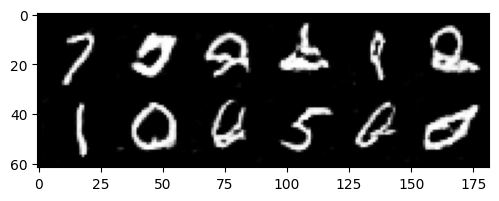


======== Epoch 91 =======
Loss     => G:4.51735, D:0.04337
Accuracy => G:0.71%, D:99.54%, Elapsed time => 50.342 sec

======== Epoch 92 =======
Loss     => G:4.51472, D:0.06471
Accuracy => G:1.45%, D:98.61%, Elapsed time => 50.224 sec

======== Epoch 93 =======
Loss     => G:4.41713, D:0.05286
Accuracy => G:0.86%, D:99.11%, Elapsed time => 50.250 sec

======== Epoch 94 =======
Loss     => G:4.30778, D:0.08640
Accuracy => G:1.75%, D:98.07%, Elapsed time => 50.250 sec

======== Epoch 95 =======
Loss     => G:4.44469, D:0.07877
Accuracy => G:1.43%, D:98.48%, Elapsed time => 50.232 sec


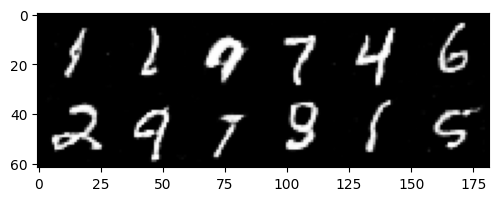


======== Epoch 96 =======
Loss     => G:4.27141, D:0.05321
Accuracy => G:0.87%, D:99.22%, Elapsed time => 50.133 sec

======== Epoch 97 =======
Loss     => G:4.60176, D:0.05148
Accuracy => G:0.89%, D:99.15%, Elapsed time => 50.567 sec

======== Epoch 98 =======
Loss     => G:4.19360, D:0.10858
Accuracy => G:2.34%, D:97.42%, Elapsed time => 50.233 sec

======== Epoch 99 =======
Loss     => G:4.47665, D:0.04528
Accuracy => G:0.67%, D:99.48%, Elapsed time => 50.267 sec

======== Epoch 100 =======
Loss     => G:4.64099, D:0.04759
Accuracy => G:1.06%, D:99.11%, Elapsed time => 50.283 sec


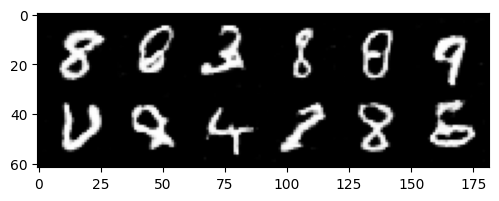


======== Epoch 101 =======
Loss     => G:4.57001, D:0.04562
Accuracy => G:0.68%, D:99.34%, Elapsed time => 50.331 sec

======== Epoch 102 =======
Loss     => G:4.28371, D:0.10408
Accuracy => G:2.25%, D:97.90%, Elapsed time => 50.036 sec

======== Epoch 103 =======
Loss     => G:4.45841, D:0.04558
Accuracy => G:0.80%, D:99.40%, Elapsed time => 50.267 sec

======== Epoch 104 =======
Loss     => G:4.61991, D:0.06110
Accuracy => G:1.30%, D:98.70%, Elapsed time => 50.522 sec

======== Epoch 105 =======
Loss     => G:4.40338, D:0.08940
Accuracy => G:1.59%, D:98.06%, Elapsed time => 50.573 sec


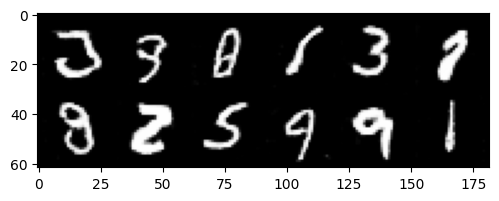


======== Epoch 106 =======
Loss     => G:4.54057, D:0.04917
Accuracy => G:0.78%, D:99.31%, Elapsed time => 50.150 sec

======== Epoch 107 =======
Loss     => G:4.69394, D:0.05131
Accuracy => G:1.20%, D:99.05%, Elapsed time => 50.305 sec

======== Epoch 108 =======
Loss     => G:4.28824, D:0.11030
Accuracy => G:2.71%, D:97.13%, Elapsed time => 50.162 sec

======== Epoch 109 =======
Loss     => G:4.51535, D:0.04635
Accuracy => G:0.85%, D:99.41%, Elapsed time => 50.117 sec

======== Epoch 110 =======
Loss     => G:4.80593, D:0.04505
Accuracy => G:0.74%, D:99.34%, Elapsed time => 50.167 sec


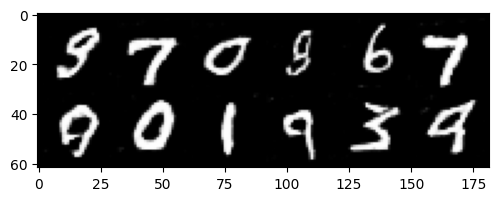


======== Epoch 111 =======
Loss     => G:4.83636, D:0.12201
Accuracy => G:1.41%, D:98.70%, Elapsed time => 50.250 sec

======== Epoch 112 =======
Loss     => G:3.87160, D:0.11463
Accuracy => G:2.79%, D:97.10%, Elapsed time => 50.150 sec

======== Epoch 113 =======
Loss     => G:4.66022, D:0.04437
Accuracy => G:0.78%, D:99.34%, Elapsed time => 50.183 sec

======== Epoch 114 =======
Loss     => G:4.82998, D:0.04139
Accuracy => G:0.72%, D:99.40%, Elapsed time => 50.981 sec

======== Epoch 115 =======
Loss     => G:4.49410, D:0.09420
Accuracy => G:1.73%, D:98.23%, Elapsed time => 50.337 sec


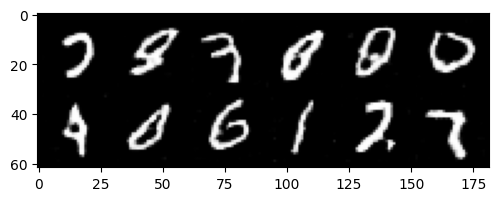


======== Epoch 116 =======
Loss     => G:4.71661, D:0.04037
Accuracy => G:0.67%, D:99.44%, Elapsed time => 50.300 sec

======== Epoch 117 =======
Loss     => G:4.78281, D:0.04521
Accuracy => G:0.89%, D:99.26%, Elapsed time => 50.255 sec

======== Epoch 118 =======
Loss     => G:4.39907, D:0.12369
Accuracy => G:2.97%, D:96.58%, Elapsed time => 50.095 sec

======== Epoch 119 =======
Loss     => G:4.46180, D:0.04662
Accuracy => G:0.62%, D:99.45%, Elapsed time => 50.316 sec

======== Epoch 120 =======
Loss     => G:4.61942, D:0.05075
Accuracy => G:1.02%, D:98.99%, Elapsed time => 50.181 sec


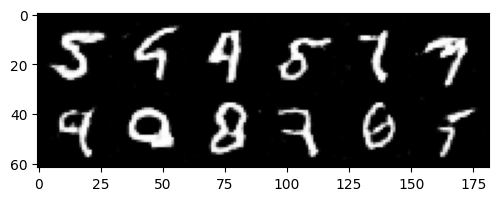


======== Epoch 121 =======
Loss     => G:4.83120, D:0.04356
Accuracy => G:0.67%, D:99.29%, Elapsed time => 50.132 sec

======== Epoch 122 =======
Loss     => G:4.73959, D:0.10527
Accuracy => G:2.18%, D:97.38%, Elapsed time => 50.418 sec

======== Epoch 123 =======
Loss     => G:4.26542, D:0.05861
Accuracy => G:0.97%, D:99.07%, Elapsed time => 50.049 sec

======== Epoch 124 =======
Loss     => G:4.85851, D:0.04077
Accuracy => G:0.75%, D:99.42%, Elapsed time => 50.451 sec

======== Epoch 125 =======
Loss     => G:4.88873, D:0.04444
Accuracy => G:0.81%, D:99.15%, Elapsed time => 50.216 sec


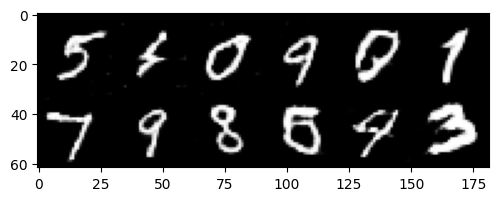


======== Epoch 126 =======
Loss     => G:4.87469, D:0.04141
Accuracy => G:0.66%, D:99.34%, Elapsed time => 50.067 sec

======== Epoch 127 =======
Loss     => G:4.31949, D:0.52725
Accuracy => G:3.88%, D:96.61%, Elapsed time => 50.355 sec

======== Epoch 128 =======
Loss     => G:4.68615, D:0.04492
Accuracy => G:0.82%, D:99.28%, Elapsed time => 50.295 sec

======== Epoch 129 =======
Loss     => G:4.83015, D:0.04524
Accuracy => G:0.64%, D:99.21%, Elapsed time => 50.300 sec

======== Epoch 130 =======
Loss     => G:4.76059, D:0.07784
Accuracy => G:1.35%, D:98.46%, Elapsed time => 50.350 sec


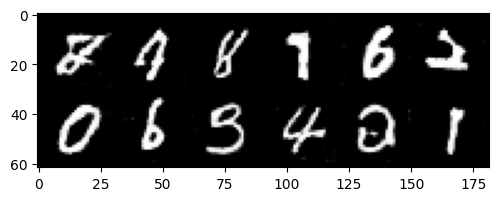


======== Epoch 131 =======
Loss     => G:4.76695, D:0.03694
Accuracy => G:0.41%, D:99.64%, Elapsed time => 50.190 sec

======== Epoch 132 =======
Loss     => G:4.48645, D:0.10226
Accuracy => G:1.82%, D:98.12%, Elapsed time => 50.077 sec

======== Epoch 133 =======
Loss     => G:4.72773, D:0.06155
Accuracy => G:1.19%, D:98.62%, Elapsed time => 50.150 sec

======== Epoch 134 =======
Loss     => G:4.76793, D:0.03782
Accuracy => G:0.53%, D:99.58%, Elapsed time => 50.150 sec

======== Epoch 135 =======
Loss     => G:4.84807, D:0.05881
Accuracy => G:1.13%, D:98.92%, Elapsed time => 50.250 sec


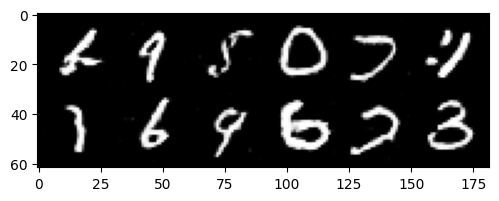


======== Epoch 136 =======
Loss     => G:4.83193, D:0.03801
Accuracy => G:0.65%, D:99.50%, Elapsed time => 50.282 sec

======== Epoch 137 =======
Loss     => G:4.47470, D:0.09652
Accuracy => G:2.59%, D:97.28%, Elapsed time => 50.423 sec

======== Epoch 138 =======
Loss     => G:4.66757, D:0.04379
Accuracy => G:0.62%, D:99.38%, Elapsed time => 50.295 sec

======== Epoch 139 =======
Loss     => G:5.03974, D:0.03398
Accuracy => G:0.34%, D:99.60%, Elapsed time => 50.449 sec

======== Epoch 140 =======
Loss     => G:4.72214, D:0.07116
Accuracy => G:1.17%, D:98.68%, Elapsed time => 50.634 sec


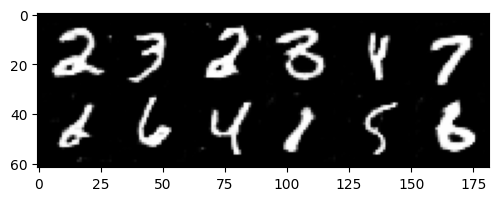


======== Epoch 141 =======
Loss     => G:5.00120, D:0.03670
Accuracy => G:0.71%, D:99.44%, Elapsed time => 50.439 sec

======== Epoch 142 =======
Loss     => G:4.51575, D:0.08998
Accuracy => G:1.75%, D:97.88%, Elapsed time => 50.258 sec

======== Epoch 143 =======
Loss     => G:4.88060, D:0.05149
Accuracy => G:1.07%, D:98.90%, Elapsed time => 50.550 sec

======== Epoch 144 =======
Loss     => G:5.04311, D:0.03245
Accuracy => G:0.41%, D:99.66%, Elapsed time => 50.656 sec

======== Epoch 145 =======
Loss     => G:4.69124, D:0.09200
Accuracy => G:2.27%, D:97.72%, Elapsed time => 50.530 sec


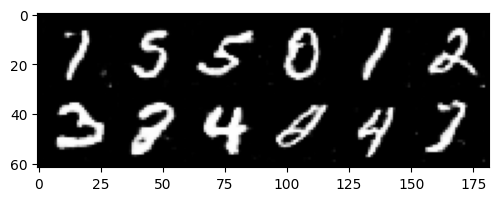


======== Epoch 146 =======
Loss     => G:4.70239, D:0.04350
Accuracy => G:0.80%, D:99.39%, Elapsed time => 49.610 sec

======== Epoch 147 =======
Loss     => G:5.14805, D:0.02947
Accuracy => G:0.40%, D:99.76%, Elapsed time => 49.377 sec

======== Epoch 148 =======
Loss     => G:4.93503, D:0.05580
Accuracy => G:1.11%, D:98.86%, Elapsed time => 49.271 sec

======== Epoch 149 =======
Loss     => G:5.07916, D:0.03605
Accuracy => G:0.64%, D:99.44%, Elapsed time => 49.203 sec

======== Epoch 150 =======
Loss     => G:4.60642, D:0.12194
Accuracy => G:2.07%, D:97.52%, Elapsed time => 49.419 sec


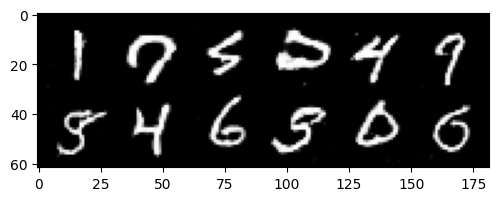


======== Epoch 151 =======
Loss     => G:4.90645, D:0.03931
Accuracy => G:0.65%, D:99.39%, Elapsed time => 49.309 sec

======== Epoch 152 =======
Loss     => G:5.00531, D:0.03791
Accuracy => G:0.76%, D:99.40%, Elapsed time => 49.253 sec

======== Epoch 153 =======
Loss     => G:5.16249, D:0.03391
Accuracy => G:0.51%, D:99.54%, Elapsed time => 49.368 sec

======== Epoch 154 =======
Loss     => G:4.76517, D:0.08903
Accuracy => G:1.41%, D:98.56%, Elapsed time => 49.379 sec

======== Epoch 155 =======
Loss     => G:5.11096, D:0.03447
Accuracy => G:0.54%, D:99.54%, Elapsed time => 49.354 sec


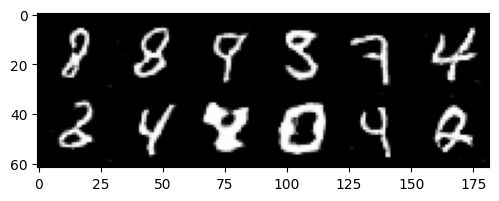


======== Epoch 156 =======
Loss     => G:5.06191, D:0.07582
Accuracy => G:1.76%, D:98.25%, Elapsed time => 49.434 sec

======== Epoch 157 =======
Loss     => G:4.74779, D:0.03921
Accuracy => G:0.60%, D:99.53%, Elapsed time => 49.402 sec

======== Epoch 158 =======
Loss     => G:5.15924, D:0.03175
Accuracy => G:0.54%, D:99.60%, Elapsed time => 49.131 sec

======== Epoch 159 =======
Loss     => G:4.77395, D:0.11460
Accuracy => G:2.05%, D:97.62%, Elapsed time => 49.521 sec

======== Epoch 160 =======
Loss     => G:4.91644, D:0.05553
Accuracy => G:1.01%, D:98.71%, Elapsed time => 49.454 sec


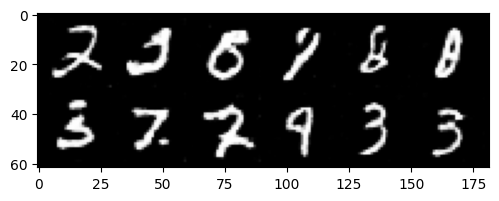


======== Epoch 161 =======
Loss     => G:5.15595, D:0.02858
Accuracy => G:0.36%, D:99.73%, Elapsed time => 49.241 sec

======== Epoch 162 =======
Loss     => G:5.24301, D:0.03171
Accuracy => G:0.40%, D:99.57%, Elapsed time => 48.820 sec

======== Epoch 163 =======
Loss     => G:5.12947, D:0.03801
Accuracy => G:0.78%, D:99.31%, Elapsed time => 49.214 sec

======== Epoch 164 =======
Loss     => G:4.92112, D:0.06371
Accuracy => G:1.06%, D:98.97%, Elapsed time => 48.902 sec

======== Epoch 165 =======
Loss     => G:4.74665, D:0.07869
Accuracy => G:1.57%, D:98.30%, Elapsed time => 49.212 sec


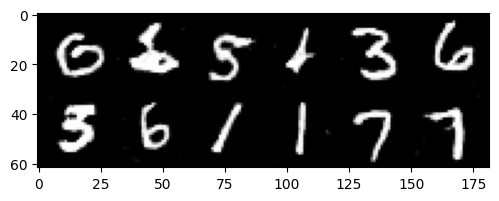


======== Epoch 166 =======
Loss     => G:5.04378, D:0.05205
Accuracy => G:0.72%, D:99.11%, Elapsed time => 49.101 sec

======== Epoch 167 =======
Loss     => G:5.10080, D:0.03219
Accuracy => G:0.42%, D:99.62%, Elapsed time => 49.204 sec

======== Epoch 168 =======
Loss     => G:5.21668, D:0.03334
Accuracy => G:0.63%, D:99.45%, Elapsed time => 49.212 sec

======== Epoch 169 =======
Loss     => G:4.97877, D:0.07088
Accuracy => G:1.47%, D:98.60%, Elapsed time => 49.339 sec

======== Epoch 170 =======
Loss     => G:5.16542, D:0.03251
Accuracy => G:0.53%, D:99.53%, Elapsed time => 49.128 sec


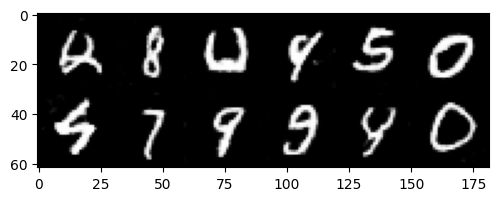


======== Epoch 171 =======
Loss     => G:5.27012, D:0.04438
Accuracy => G:0.72%, D:99.09%, Elapsed time => 49.240 sec

======== Epoch 172 =======
Loss     => G:5.29725, D:0.02993
Accuracy => G:0.38%, D:99.60%, Elapsed time => 49.347 sec

======== Epoch 173 =======
Loss     => G:4.89099, D:0.08523
Accuracy => G:1.69%, D:98.05%, Elapsed time => 49.184 sec

======== Epoch 174 =======
Loss     => G:5.16083, D:0.02917
Accuracy => G:0.41%, D:99.70%, Elapsed time => 49.268 sec

======== Epoch 175 =======
Loss     => G:5.18825, D:0.03300
Accuracy => G:0.60%, D:99.46%, Elapsed time => 49.270 sec


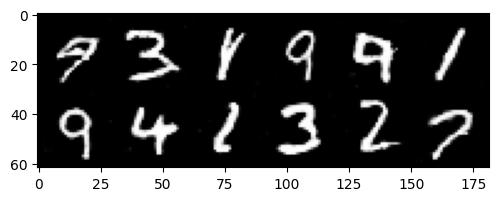


======== Epoch 176 =======
Loss     => G:5.36895, D:0.03397
Accuracy => G:0.53%, D:99.44%, Elapsed time => 49.151 sec

======== Epoch 177 =======
Loss     => G:5.41520, D:0.02775
Accuracy => G:0.39%, D:99.67%, Elapsed time => 49.278 sec

======== Epoch 178 =======
Loss     => G:4.75681, D:0.22142
Accuracy => G:2.95%, D:97.04%, Elapsed time => 49.200 sec

======== Epoch 179 =======
Loss     => G:5.17957, D:0.03346
Accuracy => G:0.45%, D:99.44%, Elapsed time => 49.253 sec

======== Epoch 180 =======
Loss     => G:4.94634, D:0.06463
Accuracy => G:1.42%, D:98.53%, Elapsed time => 49.366 sec


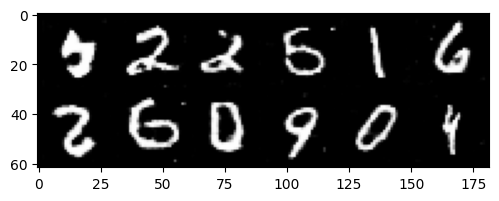


======== Epoch 181 =======
Loss     => G:5.19349, D:0.03127
Accuracy => G:0.39%, D:99.54%, Elapsed time => 49.333 sec

======== Epoch 182 =======
Loss     => G:5.31601, D:0.03737
Accuracy => G:0.49%, D:99.26%, Elapsed time => 49.324 sec

======== Epoch 183 =======
Loss     => G:5.29557, D:0.03766
Accuracy => G:0.72%, D:99.29%, Elapsed time => 49.311 sec

======== Epoch 184 =======
Loss     => G:5.10252, D:0.06621
Accuracy => G:1.39%, D:98.76%, Elapsed time => 49.432 sec

======== Epoch 185 =======
Loss     => G:5.21755, D:0.03112
Accuracy => G:0.50%, D:99.55%, Elapsed time => 49.435 sec


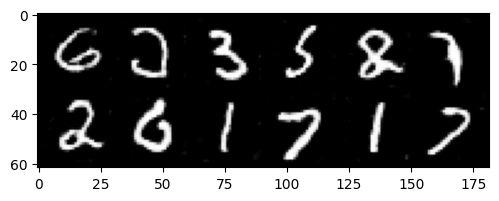


======== Epoch 186 =======
Loss     => G:5.42099, D:0.02537
Accuracy => G:0.30%, D:99.77%, Elapsed time => 49.285 sec

======== Epoch 187 =======
Loss     => G:5.19155, D:0.06254
Accuracy => G:1.47%, D:98.49%, Elapsed time => 49.314 sec

======== Epoch 188 =======
Loss     => G:5.13300, D:0.03386
Accuracy => G:0.51%, D:99.50%, Elapsed time => 49.299 sec

======== Epoch 189 =======
Loss     => G:4.98091, D:0.07279
Accuracy => G:1.50%, D:98.35%, Elapsed time => 49.252 sec

======== Epoch 190 =======
Loss     => G:5.37308, D:0.02532
Accuracy => G:0.23%, D:99.76%, Elapsed time => 49.298 sec


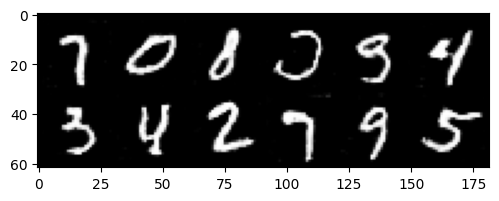


======== Epoch 191 =======
Loss     => G:5.21486, D:0.05280
Accuracy => G:1.05%, D:98.81%, Elapsed time => 49.485 sec

======== Epoch 192 =======
Loss     => G:5.39345, D:0.03088
Accuracy => G:0.48%, D:99.51%, Elapsed time => 49.368 sec

======== Epoch 193 =======
Loss     => G:5.29196, D:0.06767
Accuracy => G:1.23%, D:98.82%, Elapsed time => 49.252 sec

======== Epoch 194 =======
Loss     => G:5.14987, D:0.03667
Accuracy => G:0.58%, D:99.37%, Elapsed time => 49.280 sec

======== Epoch 195 =======
Loss     => G:5.44703, D:0.02916
Accuracy => G:0.43%, D:99.58%, Elapsed time => 49.336 sec


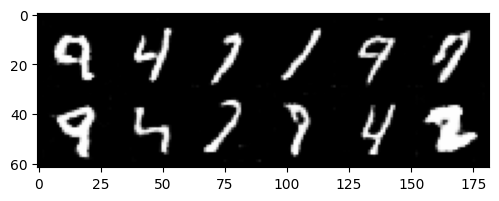


======== Epoch 196 =======
Loss     => G:5.50056, D:0.03032
Accuracy => G:0.47%, D:99.54%, Elapsed time => 49.599 sec

======== Epoch 197 =======
Loss     => G:4.98539, D:0.06942
Accuracy => G:1.29%, D:98.68%, Elapsed time => 49.549 sec

======== Epoch 198 =======
Loss     => G:5.37511, D:0.03662
Accuracy => G:0.58%, D:99.31%, Elapsed time => 49.638 sec

======== Epoch 199 =======
Loss     => G:5.51117, D:0.02504
Accuracy => G:0.31%, D:99.76%, Elapsed time => 49.651 sec

======== Epoch 200 =======
Loss     => G:5.13835, D:0.07360
Accuracy => G:1.29%, D:98.74%, Elapsed time => 49.615 sec


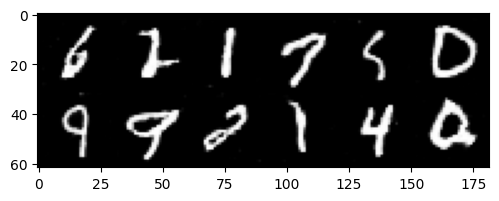

In [13]:
import time 

for epoch in range(200):
    start = time.time()
    D_train_loss, D_accuracy, D_count = 0., 0., 0.
    G_train_loss, G_accuracy, G_count = 0., 0., 0.
    
    for xb in train_loader:
        xb = xb[0]
        
        ### train Discriminator
        real_x = xb.unsqueeze(1) # https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html
        real_y = torch.ones(len(xb), 1).to(device)
        D_out = Discriminator(real_x).squeeze(-1).squeeze(-1)
        D_real_loss = criterion(D_out, real_y)
        D_accuracy += (D_out>0.5).float().eq(real_y.data).sum()
                
        z = torch.randn(len(xb), d_z, 1, 1).to(device)
        fake_x = Generator(z)
        fake_y = torch.zeros(len(xb), 1).to(device)
        D_out = Discriminator(fake_x).squeeze(-1).squeeze(-1)
        D_fake_loss = criterion(D_out, fake_y)
        D_accuracy += (D_out>0.5).float().eq(fake_y.data).sum()
        
        D_loss = D_real_loss + D_fake_loss
        D_train_loss += D_loss.item()*len(xb)
        D_count += len(xb)*2
        
        D_loss.backward()
        D_optimizer.step()
        D_optimizer.zero_grad()
        G_optimizer.zero_grad()
        
        
        ### train Generator
        z = torch.randn(len(xb), d_z, 1, 1).to(device)
        fake_x = Generator(z)
        fake_y = torch.ones(len(xb), 1).to(device)
        D_out = Discriminator(fake_x).squeeze(-1).squeeze(-1)
        G_loss = criterion(D_out, fake_y)
        G_accuracy += (D_out>0.5).float().eq(fake_y.data).sum()
        
        G_train_loss += G_loss.item()*len(xb)
        G_count += len(xb)
        
        G_loss.backward()
        G_optimizer.step()
        G_optimizer.zero_grad()
        D_optimizer.zero_grad()
    
       
    D_train_loss /= D_count
    G_train_loss /= G_count
    D_accuracy   /= D_count
    G_accuracy   /= G_count
            
    print(f"======== Epoch {epoch+1} =======")
    print(f"Loss     => G:{G_train_loss:.5f}, D:{D_train_loss:.5f}")
    print(f"Accuracy => G:{G_accuracy*100:.2f}%, D:{D_accuracy*100:.2f}%, Elapsed time => {time.time()-start:.3f} sec")
    
    ### visualize progress
    if (epoch+1)%5 == 0:
        generated_img = torchvision.utils.make_grid(fake_x.view(-1,1,28,28)[:12], nrow=6, normalize=True)
        plt.figure(figsize=(15,2))
        plt.imshow(np.transpose(generated_img.numpy(),(1,2,0)))
        plt.show()
    print("=======================================\n")